# Running the allocation algorithm for different setups
Example of Vanos scores in different European regions

To run this jupyter notebook, you need to upload the necessary vanos files in "inputs/tor_runs/"

In [2]:
# imports
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
# file location
path = "../inputs/tor_runs/"

## Part 1: Southern Europe
Note: here, all three cases are treated separately. Therefore, lead_ID = lead time, and not (case, lead_time)

In [3]:
# === open file, rename to fit code convertions and saved separately ===
ds = xr.open_dataset(f"{path}Vanos_south.nc").rename({"event":"case","leadtime":"lead_ID","realization":"member"}).drop_vars(("quantile"))
cases = [] # list of the three cases
for case in ds.case:
    cases.append(case.values)
    ds["lead_ID"] = [f"{str(ld)[0:10]}" for ld in ds.lead_ID.values]
    ds.sel(case=case).drop_vars("case").to_netcdf(f"{path}boosted_{case.values}_vanos.nc")

/tmp/ipykernel_62297/2822994776.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_62297/2822994776.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(score_case.lead_ID.values,rotation=45)
/tmp/ipykernel_62297/2822994776.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(score_case.lead_ID.values,rotation=45)


Text(0, 0.5, 'Maximum temperature [$^\\circ$C]')

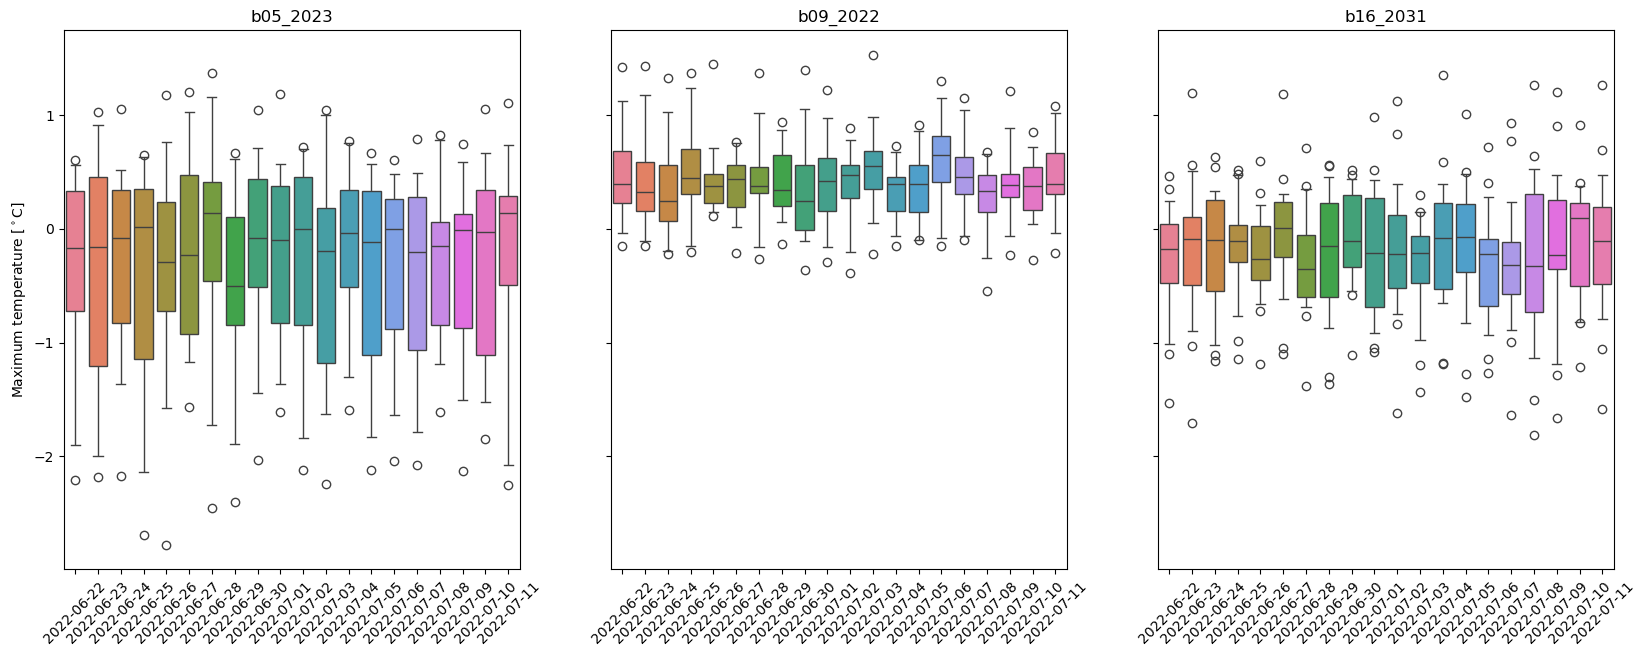

In [25]:
# === Analysis of boosted results so far ===
#figure params
f,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)#, width_ratios=[1, 17],sharey=True)
whis = (5,95) #whisker setting on box plot
for i,case in enumerate(ds.case.values):
    score_case = ds.sel(case=case).score
    sns.boxplot(score_case,ax=ax[i],whis=whis)
    ax[i].set_title(case)
    ax[i].set_xticklabels(score_case.lead_ID.values,rotation=45)
ax[0].set_ylabel("Maximum temperature [$^\circ$C]")

In [3]:
# === Run ===
n_top = 10 # the number of top events to be taken into account for the allocation
n_batch = 100 # the total number of new allocated realizations
allocation_type = "Weighted"
for case in cases:
    print(case)
    file = f'{path}boosted_{case}_vanos.nc'
    %run ../code/allocation_algorithm.py {file} {n_top} {n_batch} {allocation_type}

b05_2023
opening ../inputs/tor_runs/boosted_b05_2023_vanos.nc, allocation length = 10, batch size = 100
{'2023-06-08': 47, '2023-06-09': 20, '2023-06-17': 22, '2023-06-04': 11, '2023-06-13': 0}
b09_2022
opening ../inputs/tor_runs/boosted_b09_2022_vanos.nc, allocation length = 10, batch size = 100
{'2022-06-24': 34, '2022-06-25': 36, '2022-06-27': 20, '2022-07-04': 6, '2022-06-23': 4}
b16_2031
opening ../inputs/tor_runs/boosted_b16_2031_vanos.nc, allocation length = 10, batch size = 100
{'2031-06-08': 20, '2031-06-22': 16, '2031-06-19': 16, '2031-06-11': 13, '2031-06-26': 13, '2031-06-27': 11, '2031-06-16': 8, '2031-06-18': 3, '2031-06-23': 0}
